In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lml(alpha,beta,Phi,Y):


    N = len(Y)
    S = np.dot(np.dot(Phi,alpha*np.identity(len(Phi[0]))),np.transpose(Phi))+beta*np.identity(len(np.dot(Phi,np.transpose(Phi))))
    n1 = -N*0.5*np.log(2*np.pi)
    sign,l = np.linalg.slogdet(S)
    n2 = -0.5*(sign*l)
    n3 = -0.5*np.dot(np.dot(np.transpose(Y),np.linalg.inv(S)),Y)
    return (n1+n2+n3)[0][0]
a = 3.0
b = 4.0
p = np.array([[3,2,6,7],[2,3,6,6],[7,3,3,4]])
y = np.array([[2],[5],[6]])

#lml(a,b,p,y)
#lml1(a,b,p,y)

def grad_lml(alpha,beta,Phi,Y):
    S = np.dot(np.dot(Phi, alpha * np.identity(len(Phi[0]))), np.transpose(Phi)) + beta * np.identity(
        len(np.dot(Phi, np.transpose(Phi))))
    P = np.dot(Phi,np.transpose(Phi))

    a1 = np.dot(np.dot(-np.linalg.inv(S),P),np.linalg.inv(S))
    a2 = -0.5*np.dot(np.dot(np.transpose(Y),a1),Y)
    d_lml_d_alpha = -0.5*np.trace(np.dot(np.linalg.inv(S),P))+a2

    b1 = np.dot(-np.linalg.inv(S),np.linalg.inv(S))
    b2 = -0.5*np.dot(np.dot(np.transpose(Y),b1),Y)
    d_lml_d_beta = -0.5*np.trace(np.linalg.inv(S))+b2
    output = np.array([[d_lml_d_alpha[0][0]],[d_lml_d_beta[0][0]]])
    return output






In [2]:
#==========================================================1b)
N = 25
x = np.reshape(np.linspace(0,0.9,N),(N,1))
y = np.cos(10*x**2) + 0.1*np.sin(100*x)


50001
55001
60001
65001
70001
75001
80001
85001
90001
95001
100001
105001


TypeError: object of type 'int' has no len()

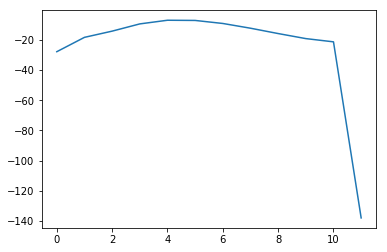

In [4]:

#================================================================1c)

def designM_trigo(x,order):
    phi = np.ones([len(x),1])
    for i in range(1,order+1):
        psin = np.sin(2*np.pi*i*x)
        pcos = np.cos(2*np.pi*i*x)
        phi = np.hstack((phi, psin))
        phi = np.hstack((phi, pcos))
    return phi
value = []

#compute the max log likelihood for order 0 to 11 with trigo basis by gradient descent
for order in range(12):
    phi_trigo = designM_trigo(x,order)
    x0 = np.array([[0.34], [0.37]])
    gamma = 0.000024

    x1 = x0 + grad_lml(x0[0][0], x0[1][0], phi_trigo, y) * gamma
    #x_vec = [x0[0][0], x1[0][0]]
    #y_vec = [x0[1][0], x1[1][0]]
    z_vec = [lml(x0[0][0], x0[1][0], phi_trigo, y), lml(x1[0][0], x1[1][0], phi_trigo, y)]
    x_current = x1
    t = 1
    i = 2
    while t<5000*(order+10):
        x_next = x_current + gamma * grad_lml(x_current[0][0], x_current[1][0], phi_trigo, y)
        z_current = lml(x_current[0][0], x_current[1][0], phi_trigo, y)
        #x_vec.append(x_next[0][0])
        #y_vec.append(x_next[1][0])
        x_current = x_next
        t += 1
        z_vec.append(z_current)
    value.append(z_vec[-1])
    print(len(z_vec))
order_vec = np.linspace(0,11,12)

plt.plot(order_vec,value,label='log marginal likelihood ')
plt.xticks(order)
plt.xlabel('order')
plt.ylabel('log marginal likelihood value')
#refer the result from cw2 for the cross validation graph
